In [5]:
import numpy as np
import numpy
import math
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
poisson_vals = {}
max_cars_a = 20
max_cars_b = 20
max_req_a = 10
max_req_b = 10
max_ret_a = 10
max_ret_b = 10
lamda_req_a = 3
lamda_req_b = 4
lamda_ret_a = 3 
lamda_ret_b = 2 

In [7]:
math.exp(1)

2.718281828459045

In [8]:
def get_poisson_val(lamda, n):
    global poisson_vals
    if ((lamda, n) in poisson_vals):
        return poisson_vals[(lamda, n)]
    else:
        poisson_vals[(lamda, n)] = (np.power(lamda, n) * np.exp(-lamda)) / np.math.factorial(n)
        return poisson_vals[(lamda, n)]

In [9]:
def get_reward(sa, sb, v, action):
    carsA = max(min(sa - action, max_cars_a), 0)
    carsB = max(min(sb - action, max_cars_b), 0)    
    ret = 0
    for req_a in range(max_req_a):
        for req_b in range(max_req_b):
            for ret_a in range(max_ret_a):
                for ret_b in range(max_ret_b):
                    rent_a = min(carsA, req_a)
                    rent_b = min(carsB, req_b)
                    left_a = max(min(carsA - rent_a + ret_a, max_cars_a), 0)
                    left_b = max(min(carsB - rent_b + ret_b, max_cars_b), 0)
                    prob = get_poisson_val(lamda_req_a, req_a) * get_poisson_val(lamda_req_b, req_b) * get_poisson_val(lamda_ret_a, ret_a) * get_poisson_val(lamda_ret_b, ret_b)
                    reward = (rent_a + rent_b)*10
                    reward += abs(action) * (-2)
                    if (action > 0):
                        reward+=2
                    if (left_a > 10):
                        reward -=4
                    if (left_b > 10):
                        reward -=4
                    ret += prob * (reward + 0.9*v[int(left_a)][int(left_b)])
    return ret

In [15]:
def policy_iteration():
    v = np.zeros((max_cars_a + 1, max_cars_b + 1))
    policy = np.zeros((max_cars_a + 1, max_cars_b + 1))
    num_states = (max_cars_a + 1) * (max_cars_b + 1)
    max_car_transfer = 5
    actions = []
    for i in range(-max_car_transfer, max_car_transfer + 1):
        actions.append(i)
    num_actions = len(actions)
    flag = True
    while (True):
        while (True):
            delta = 0
            for sa in range(max_cars_a + 1):
                for sb in range(max_cars_b + 1):
                    action = policy[sa][sb]
                    val = v[sa][sb]
                    reward = get_reward(sa, sb, v, action)
                    v[sa][sb] = reward
                    delta = max(delta, abs(val - reward))
            print("delta = ", delta)                    
            if delta < 1:
                break
        
    #     flag3 = True

        policy_stable = True
        for sa in range(max_cars_a + 1):
            for sb in range(max_cars_b + 1):
                old_action = policy[sa][sb]
                li = []
                for action in actions:
                    li.append(get_reward(sa, sb, v, action)) 
                    
                maxind = numpy.argmax(li)
                bestaction = actions[maxind]
                policy[sa][sb] = bestaction
                if (old_action != bestaction):
                    policy_stable = False      
        plt.pcolor(policy)
        plt.show()
        plot_3d(v)
        plt.show()
        if (policy_stable):
            break


delta =  167.55783985680554
delta =  116.1443174827184
delta =  78.3254865984508
delta =  61.72408268838737
delta =  48.503390805397544
delta =  37.19069812693397
delta =  28.598928100794808
delta =  22.308565753999233
delta =  18.35509133824175
delta =  15.116113205895601
delta =  12.42031099180889
delta =  10.183732320496347
delta =  8.33323620086992
delta =  6.806248840529122
delta =  5.549508072344793
delta =  4.51777784212851
delta =  3.672747748726181
delta =  2.9821012277603813
delta =  2.41870412851938
delta =  1.9598826563426996
delta =  1.586776958903954
delta =  1.2837653539295388
delta =  1.0379566963522961
delta =  0.8387479868881655


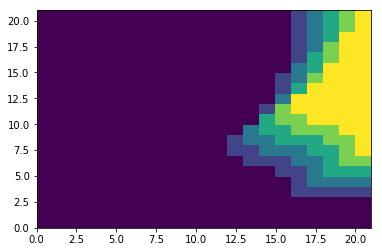

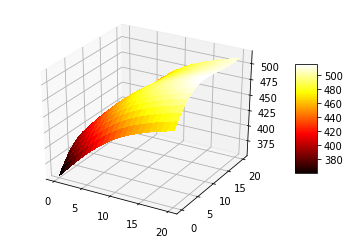

delta =  75.6317343541051
delta =  34.931886072373175
delta =  19.417491791314887
delta =  10.863341409433644
delta =  5.8936831939656145
delta =  3.1400016656158414
delta =  1.697851030438244
delta =  1.0721317951070546
delta =  0.7801559429491363


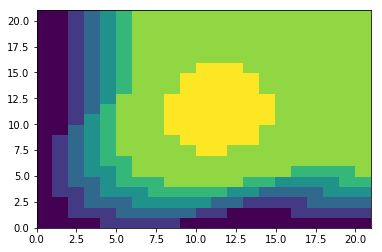

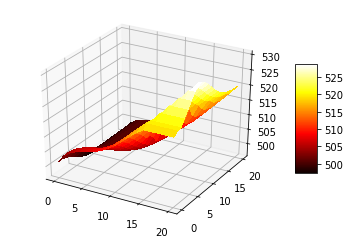

delta =  21.044514334941255
delta =  11.907008331327006
delta =  8.37890834769371
delta =  6.406488486601461
delta =  4.990340248660232
delta =  3.8972893526575945
delta =  3.188221870482721
delta =  2.7257640710530495
delta =  2.2978576663476815
delta =  1.9069423883057652
delta =  1.564436975950116
delta =  1.2735374031585707
delta =  1.0330002712241821
delta =  0.8370066736323452


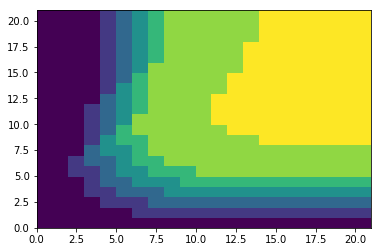

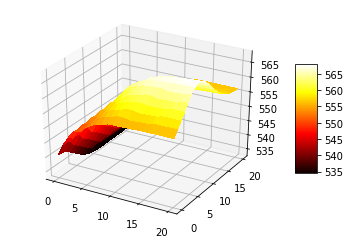

delta =  2.9564651723893576
delta =  1.3549069591483658
delta =  1.0379346703674628
delta =  0.8223498195650336


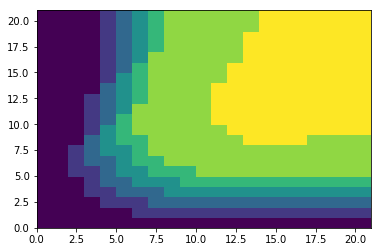

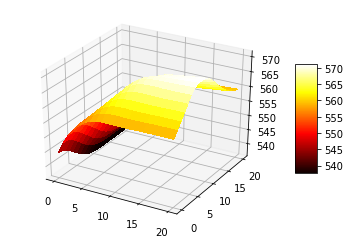

delta =  0.7583851255940317


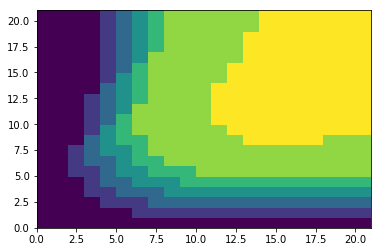

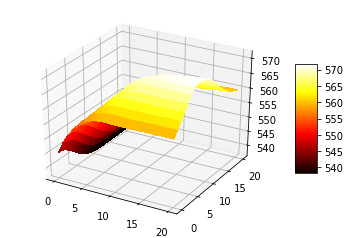

delta =  0.5651134834862432


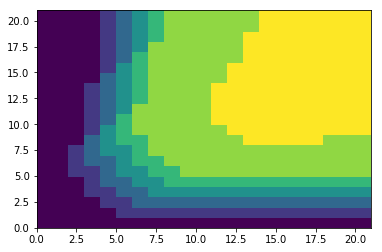

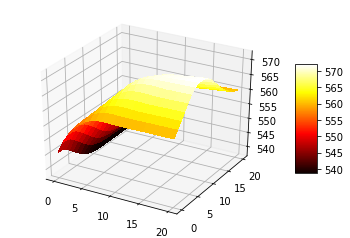

delta =  0.504459200489805


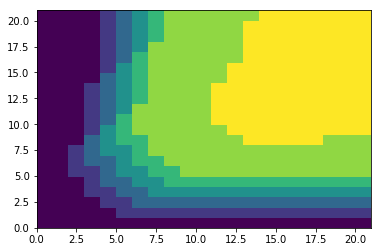

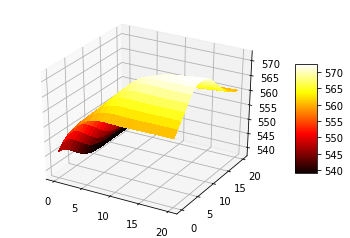

delta =  0.38929953246133664


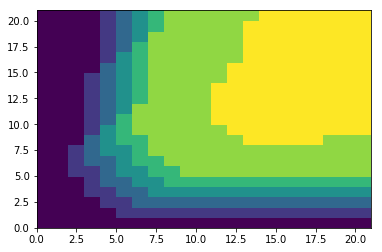

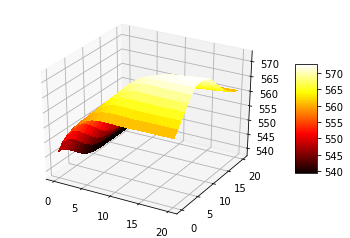

delta =  0.3161584656703553


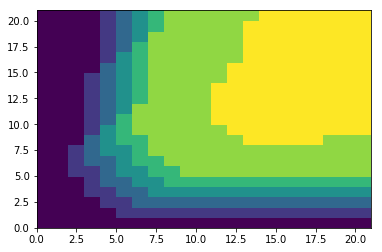

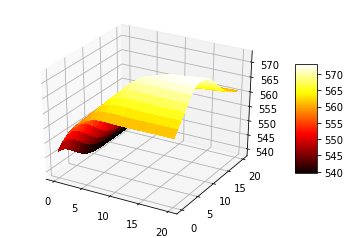

In [16]:
policy_iteration()

In [14]:
#Plotting code taken from https://stackoverflow.com/questions/11766536/matplotlib-3d-surface-from-a-rectangular-array-of-heights
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
def plot_3d(v):
    X = np.arange(0, 21)
    Y = np.arange(0, 21)
    X, Y = np.meshgrid(X, Y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, v, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)

    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()